In [44]:
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plot

%matplotlib notebook
import mpld3
mpld3.enable_notebook()

In [45]:
import nest
import numpy as np
import numpy.ma as ma #for masked arrays

from lsm.nest import LSM
from lsm.utils import poisson_generator

import pandas as pd

The first step is to obtain spike trains from the resized video. I used the following steps.
1. The video is parsed as a csv file which is then converted to a dataframe using pandas.
2. Spikes are then generated using a poisson generator for each movie (each movie shows bars moving in some direction)
3. Spike trains are then appended to create a training dataset

In [46]:
# creates dataframes of moving bands in different directions
data4_000=pd.read_csv('/Users/calebparikh/Documents/dissertation/Moving bars/PVC-11/stimuli_gratings/4_000.csv', sep=',',header=None)
data4_090=pd.read_csv('/Users/calebparikh/Documents/dissertation/Moving bars/PVC-11/stimuli_gratings/4_090.csv', sep=',',header=None)
data4_180=pd.read_csv('/Users/calebparikh/Documents/dissertation/Moving bars/PVC-11/stimuli_gratings/4_180.csv', sep=',',header=None)
data4_270=pd.read_csv('/Users/calebparikh/Documents/dissertation/Moving bars/PVC-11/stimuli_gratings/4_270.csv', sep=',',header=None)


# data4_090.values
# data4_090.head()
# data4_090.shape

In [47]:
# function that generates spike patterns using poisson distribution based on spike rate

# stimulus paramters
stim_length = 1


def gen_stimulus_variable_pattern(rate): 
    return poisson_generator(rate, t_stop=stim_length)

In [48]:
# generate spike trains for all neurons, with movie for a direction 
# function takes a dataframe with neuronal patterns for a certain direction and resturnse list of arrays for train for each neuron
# target assigned every time new burst is created

def directedSpikes(df,label):
    temp = np.array([])
    trains = []
    targets = []

    for j in range(len(df)):
        neuron = df.iloc[j, :].values
        targets.append(label)
        for i in range(len(neuron)):
            temp = np.append(temp,gen_stimulus_variable_pattern(neuron[i]))
            print(type(neuron[1]))
            print(neuron[1])
        trains.append(temp)
    targets = np.full((len(neuron)), label)
#     print(neuron[1])
    return trains, targets


In [49]:
a = gen_stimulus_variable_pattern(np.array([124]))
print(a)


[]


In [50]:
# spike train for each movie

train1, target1 = directedSpikes(data4_000,1)
train2, target2 = directedSpikes(data4_090,0)
train3, target3 = directedSpikes(data4_180,0)
train4, target4 = directedSpikes(data4_270,0)

# append spike trains together
inputSpikes = []
targetCumulative = []

inputSpikes2 = []
targetCumulative2 = []
for i in range(len(train1)):
    inputSpikes.append(np.concatenate((train1[i], train2[i],train3[i],train4[i]), axis=0))
    inputSpikes2.append(np.concatenate((train1[i], train2[i],train3[i],train4[i],train1[i], train2[i],train3[i],train4[i]), axis=0))

targetCumulative.append(np.concatenate((target1, target2,target3,target4), axis=0))

targetCumulative2 = np.repeat(targetCumulative,2,axis=1)
targetCumulative2 = list(targetCumulative2)
inputSpikes[0].size
type(targetCumulative2)
# 

<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'nump

<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'nump

<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
127
<class 'numpy.int64'>
126
<class 'numpy.int64'>
126
<class 'numpy.int64'>
126
<class 'numpy.int64'>
126
<class 'numpy.int64'>
126
<class 'numpy.int64'>
126
<class 'numpy.int64'>
126
<class 'numpy.int64'>
126
<class 'nump

<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'numpy.int64'>
139
<class 'nump

<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'numpy.int64'>
142
<class 'nump

list

In [51]:
# doubling simulation input length
# targetCumulative = targetCumulative2
# inputSpikes = inputSpikes2
# type(targetCumulative[0])


<IPython.core.display.Javascript object>


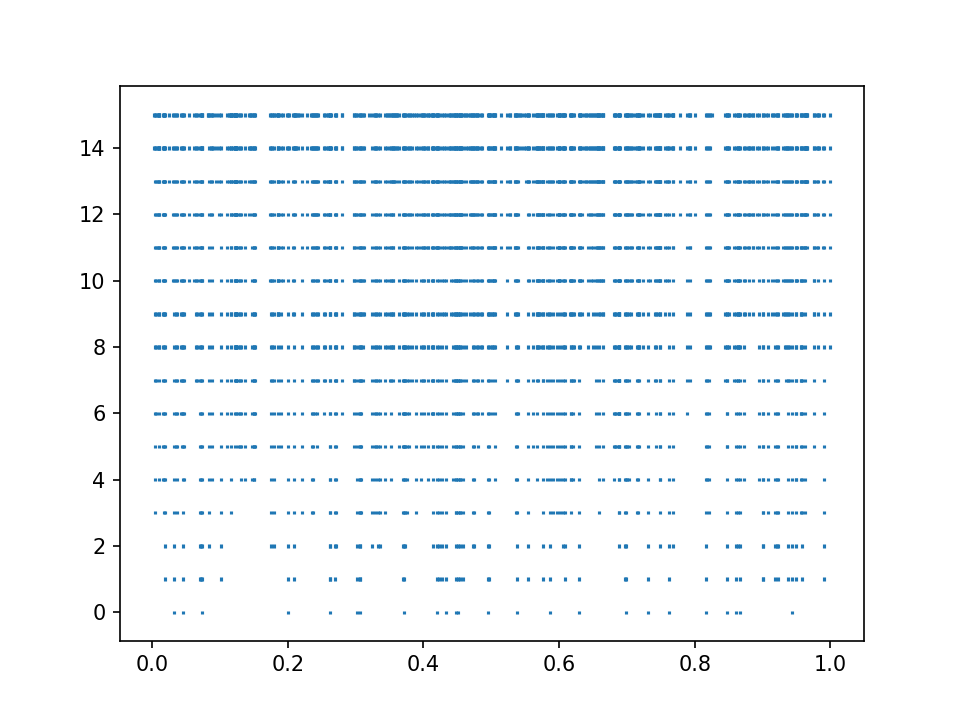

(12,)

In [52]:
plot.eventplot(inputSpikes,linelengths=0.1)     
plot.show()
train1[1].shape

Now that we have our training data we need to create a liquid and inject our spikes into it

In [53]:
def inject_spikes(inp_spikes, neuron_targets):
    spike_generators = nest.Create("spike_generator", len(inputSpikes))

#     for sg, sp in zip(spike_generators, inputSpikes):
#         nest.SetStatus([sg], {'spike_times': sp})

    delay = dict(distribution='normal_clipped', mu=10., sigma=20., low=3., high=200.)
    C_inp = 100  # int(N_E / 20)  # number of outgoing input synapses per input neuron

    nest.Connect(spike_generators, neuron_targets,
                 {'rule': 'fixed_outdegree',
                  'outdegree': C_inp},
                 {'model': 'static_synapse',
                  'delay': delay,
                  'weight': {'distribution': 'uniform',
                             'low': 2.5 * 10 * 5.0,
                             'high': 7.5 * 10 * 5.0}
                  })

In [54]:
# Set parameters for the simulation kernel. print progress info during sim, use 11 local threads

# nest.SetKernelStatus({'print_time': True, 'local_num_threads': 11})
sim_time = 200000

# stimulus parameters
stim_interval = 300
stim_length = 50
stim_rate = 200  # [1/s]

readout_delay = 10

# set discrete times to inject st
stim_times = np.arange(stim_interval, sim_time - stim_length - readout_delay, stim_interval)
readout_times = stim_times + stim_length + readout_delay
# create liquid state machine object
lsm = LSM(n_exc=1000, n_inh=250, n_rec=500)
# inject input spikes onto input nodes
inject_spikes(inputSpikes, lsm.inp_nodes)


# 



In [11]:
# performance of simulation

# run simulation for some time
nest.Simulate(sim_time)

In [55]:
type(targetCumulative[0])
targetCumulative.size

AttributeError: 'list' object has no attribute 'size'

In [59]:
# loose understanding of what this does
# targetCumulative = targetCumulative[0]
targetCumulative = targetCumulative


readout_times = readout_times[5:]
targets = targetCumulative[5:]

readout_times_new = np.linspace(1860,199860,195)
states = lsm.get_states(readout_times_new, tau=20)



IndexError: invalid index to scalar variable.

In [60]:
states.shape
targets.shape

(195,)

In [15]:
# add constant component to states for bias (TODO why?)
states = np.hstack([states, np.ones((np.size(states, 0), 1))])

n_examples = np.size(targetCumulative, 0)
n_examples_train = int(n_examples * 0.8)

train_states, test_states = states[:n_examples_train, :], states[n_examples_train:, :]
train_targets, test_targets = targets[:n_examples_train], targets[n_examples_train:]

readout_weights = lsm.compute_readout_weights(train_states, train_targets, reg_fact=5.0)


In [16]:
print(states.shape)
print(targets.shape)
print(test_states.shape)
print(test_targets.shape)
print(train_states.shape)
print(train_targets.shape)
501+160
# print(readout_times.shape)
# states
# readout_times_new = np.linspace(1860,199860,195)
# readout_times.shape

(195, 501)
(195,)
(35, 501)
(35,)
(160, 501)
(160,)


661

In [17]:
def classify(prediction):
        return (prediction >= 0.5).astype(int)

In [18]:
train_prediction = lsm.compute_prediction(train_states, readout_weights)
train_results = classify(train_prediction)

test_prediction = lsm.compute_prediction(test_states, readout_weights)
test_results = classify(test_prediction)

# 

In [19]:
print(states.shape)
print(targets.shape)

(195, 501)
(195,)


In [20]:
train_states.shape
test_states.shape
# n_examples_train
# n_examples
states

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.3730929 , 0.26029808, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.05996033, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.39258587, ..., 0.05502322, 0.        ,
        1.        ]])

In [21]:
print("simulation time: {}ms".format(sim_time))
print("number of stimuli: {}".format(len(stim_times)))
print("size of each state: {}".format(np.size(states, 1)))

print("---------------------------------------")

def eval_prediction(prediction, targets, label):
    n_fails = sum(abs(prediction - targets))
    n_total = len(targets)
    print("mismatched {} examples: {:d}/{:d} [{:.1f}%]".format(label, n_fails, n_total, n_fails / n_total * 100))

eval_prediction(train_results, train_targets, "training")
eval_prediction(test_results, test_targets, "test")


# 

simulation time: 200000ms
number of stimuli: 666
size of each state: 501
---------------------------------------
mismatched training examples: 0/160 [0.0%]
mismatched test examples: 3/35 [8.6%]


In [ ]:
test_results.shape
test_targets.shape

In [ ]:
train_results.shape
train_targets.shape

In [ ]:
readout_weights

In [33]:
train_results

NameError: name 'train_results' is not defined

In [34]:
test_targets

NameError: name 'test_targets' is not defined